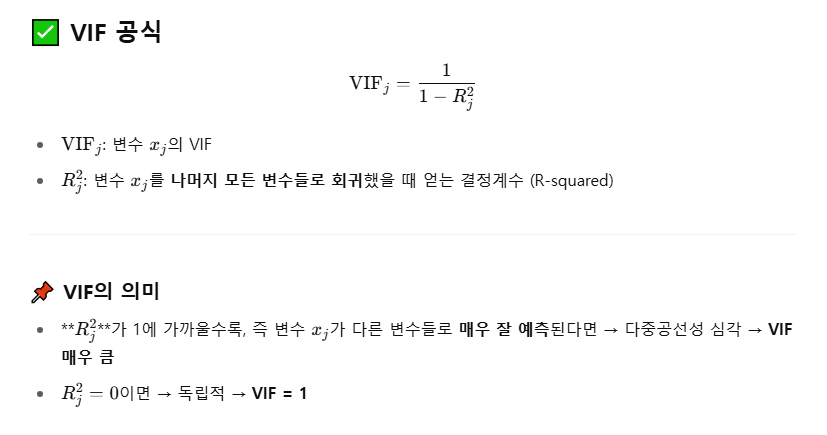
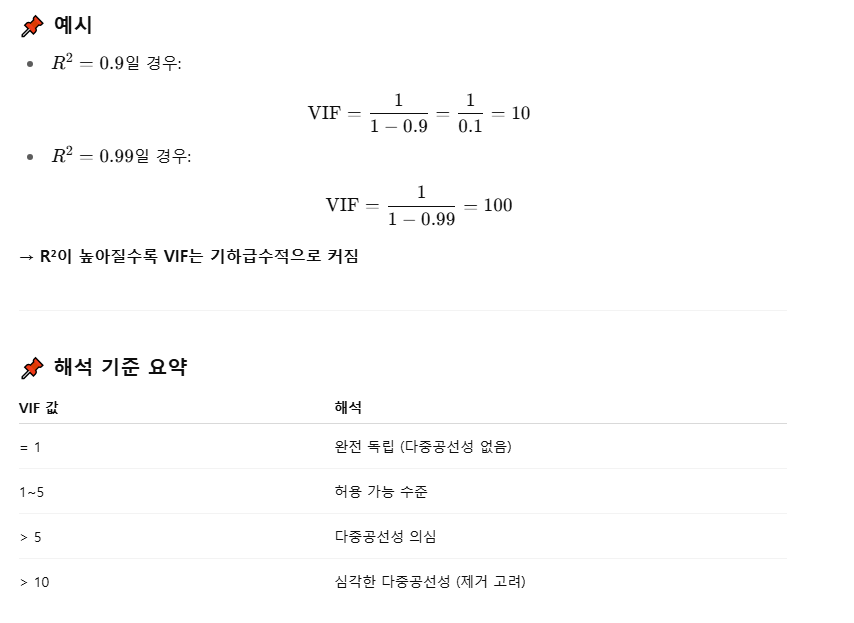

In [14]:
import pandas as pd
import numpy as np

np.random.seed(1234)

x1 = np.random.rand(100)
x2 = np.random.rand(100) * 0.5 + np.random.rand(100) * 0.5
x3 = np.random.rand(100) + np.random.rand(100)

df = pd.DataFrame({
    'x1': x1,
    'x2': x1 * 2 + x2,
    'x3': x3,
})

df

,x1,x2,x3
0,0.191519,1.256117,1.000872
1,0.622109,2.038891,1.710839
2,0.437728,1.587730,0.450477
3,0.785359,2.314841,0.860048
4,0.779976,2.405265,1.107728
...,...,...,...
95,0.502560,1.354948,1.113593
96,0.536878,1.679261,1.406157
97,0.819202,2.101036,1.728700
98,0.057116,0.829401,0.371439


In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

X_sm = sm.add_constant(df)

vif_sm = pd.DataFrame()
vif_sm["feature"] = X_sm.columns
vif_sm["VIF"] = [variance_inflation_factor(X_sm.values, i) for i in range(X_sm.shape[1])]

print("statsmodels 방식:\n", vif_sm)

statsmodels 방식:
   feature        VIF
0   const  15.389385
1      x1   8.659703
2      x2   8.672482
3      x3   1.005471


c:\users\vvv30\appdata\local\programs\python\python37\lib\site-packages\numpy\core\fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [19]:
from sklearn.linear_model import LinearRegression

def calculate_vif_sklearn(X):
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_values = []

    for i in range(X.shape[1]):
        X_excl = X.drop(columns=X.columns[i])
        y = X.iloc[:, i]

        # print(X_excl)
        # print(y)
        
        model = LinearRegression()
        model.fit(X_excl, y)
        r_squared = model.score(X_excl, y)

        vif = 1 / (1 - r_squared) if r_squared < 1 else np.inf
        vif_values.append(vif)

    vif_data["VIF"] = vif_values
    return vif_data

vif_sklearn = calculate_vif_sklearn(df)
print("sklearn 방식:\n", vif_sklearn)

0     0.191519
1     0.622109
2     0.437728
3     0.785359
4     0.779976
        ...   
95    0.502560
96    0.536878
97    0.819202
98    0.057116
99    0.669422
Name: x1, Length: 100, dtype: float64
0     1.256117
1     2.038891
2     1.587730
3     2.314841
4     2.405265
        ...   
95    1.354948
96    1.679261
97    2.101036
98    0.829401
99    1.870582
Name: x2, Length: 100, dtype: float64
0     1.000872
1     1.710839
2     0.450477
3     0.860048
4     1.107728
        ...   
95    1.113593
96    1.406157
97    1.728700
98    0.371439
99    0.951157
Name: x3, Length: 100, dtype: float64
sklearn 방식:
   feature       VIF
0      x1  8.659703
1      x2  8.672482
2      x3  1.005471
